# ```Monte Carlo``` Simulation Tutorial #

### What is ```Monte Carlo``` Simulation? ###
```Monte Carlo``` simulations are a broad class of algorithms that rely on repeated random sampling to simulate real-world phenomena. The underlying concept is to use randomness to solve problems that might be deterministic in principle but for which it could be hard to know the exact answer. Therefore, randomness is leveraged to estimate the answer.

### Instalation ###
No need for installs.

---

### Importing Dependencies ###

In [1]:
import time
import math
import random
import numpy as np

from IPython.display import display, clear_output

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
%matplotlib inline

### Main ###
**Problem Statement:** Consider a first quadrant (circular sector) inscribed in a unit square. Prove that the ratio of their areas approximates to ```π/4```, using Monte Carlo.

In [2]:
def update_plot(_x_in, _y_in, _x_out, _y_out):
    plt.close()
    # Preparing the data
    in_counter = len(_x_in)
    out_counter = len(_x_out)
    pi = (4 * in_counter) / (in_counter + out_counter) # 'pi': pi/4 ~ in_counter/(in_counter + out_counter)
    _labels = np.linspace(0,1,11)
    ## Plot
    fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize= (8, 8), dpi=75)
    # Rectangle
    ax.add_patch(Rectangle(xy= (0, 0),
                        width= 1, height= 1,
                        fill=False, edgecolor= "black", linewidth= 2))
    # Circular Sector
    ax.add_patch(Circle(xy= (0, 0),
                        radius= 1,
                        fill=False, edgecolor= "black", linewidth= 2))
    # Scatter (Inside + Outside)
    ax.scatter(_x_in, _y_in, marker="o", s=5, c="red", label="Inside")
    ax.scatter(_x_out, _y_out, marker="o", s=5, c="blue", label="Inside")
    # Box Aspect
    ax.set_box_aspect(1) # Square axes, no matter what the data limits are
    # Axis Limits
    ax.set_xlim(xmin=0, xmax=1)
    ax.set_ylim(ymin=0, ymax=1)
    # Ticks
    ax.set_xticks(ticks=_labels)
    ax.set_yticks(ticks=_labels)
    ax.tick_params(axis="both", which="both", color="gray", grid_alpha=0.5)
    # Text (Counters)
    ax.text(x=0, y=1.025, s="Reds = {}".format(in_counter), c="red")
    ax.text(x=0.2, y=1.025, s="Blues = {}".format(out_counter), c="blue")
    ax.text(x=0.4, y=1.025, s="pi Value = {}".format(pi), c="black")
    # Title
    ax.set_title("Monte Carlo Simulation", loc= "center", fontsize= 14, fontname= "sans-serif", pad= 35) # Plot title
    # Grid
    ax.grid(which="both", color= "gray", alpha=0.25)
    # Show
    display(fig)    
    clear_output(wait=True)

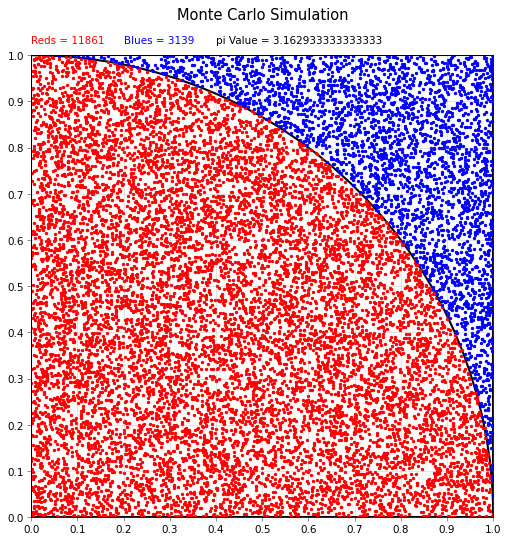

In [3]:
# Placeholders
_x_in = [] # Red
_y_in = []
_x_out = [] # Blue
_y_out = []
# Looping 'epochs'...
for epoch in range(100):
    # Generating batches of 200 points (linearly distributed)
    epoch_x = np.random.uniform(low=0, high=1, size=150) # 'size': ouput format (tuples used for multi-dimensional arrays)
    epoch_y = np.random.uniform(low=0, high=1, size=150)
    # Zipping
    epoch_zip = zip(epoch_x, epoch_y)
    # Populating 'inside'/'outside' lists
    for point in epoch_zip:
        # Checking location (x^2 + y^2 = 1 as frontier)
        if point[0] <= math.sqrt(1 - point[1]**2):
            _x_in.append(point[0])
            _y_in.append(point[1])
        else:
            _x_out.append(point[0])
            _y_out.append(point[1])
    # Plotting
    update_plot(_x_in, _y_in, _x_out, _y_out)

---